In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens/')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=2,processes=False,memory_limit='25gb',threads_per_worker=4,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)
scheduler_info=client.scheduler_info()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38643 instead
  warnings.warn(


In [3]:
len(client.scheduler_info()['workers'])

2

In [4]:
from skylens import *
from survey_utils import *

In [5]:
#only for python3
import importlib
reload=importlib.reload

In [6]:
zs=lsst_source_tomo_bins()
corr_ll=('shear', 'shear')

ns0:  27.0


In [7]:
wigner_files={}
# wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
# wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'
wig_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/'
wigner_files[0]= wig_home+'dask_wig3j_l3500_w2100_0_reorder.zarr'
wigner_files[2]= wig_home+'/dask_wig3j_l3500_w2100_2_reorder.zarr'


# Power Spectrum covariance

In [8]:
#setup parameters
lmax_cl=2000
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-1
Nl_bins=20
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins)))
l_bins=np.append(0,l_bins)
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl+0.01),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=False
tidal_SSV_cov=False
Tri_cov=False

In [9]:
l_bins,l_bins.shape

(array([   0,   10,   13,   17,   23,   30,   40,   53,   70,   93,  122,
         162,  214,  283,  375,  495,  655,  866, 1144, 1512, 1998]),
 (21,))

In [103]:
??hankel_transform

In [10]:
xi_win_approx=True
do_xi=True
bin_xi=True
bin_cl=True
th_min=25/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins*40)
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

#Hankel Transform setup
WT_kwargs={'l':l0,'theta':th*d2r,'s1_s2':[(2,2),(2,-2),(0,0),(0,2)]}
WT=wigner_transform(**WT_kwargs)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide


In [11]:
nside=64
window_lmax=nside*3-1

In [12]:
use_window=True
do_cov=True

In [13]:
f_sky=0.3

In [14]:
unit_window=True

In [15]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside,unit_win=unit_window,f_sky=f_sky,use_shot_noise=False)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:74: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide


Win gen: step size 192 True False 191 31.0
Window done. Size: 1.6e-05


../skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally

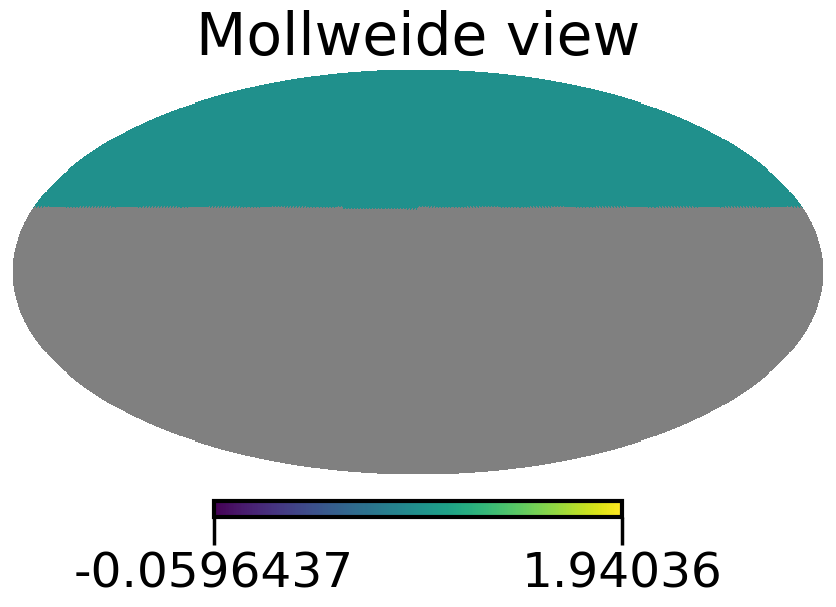

In [16]:
hp.mollview(zs_bin1[0]['window'])

In [17]:
store_win=True

In [18]:
do_pseudo_cl=True

In [19]:
import skylens
reload(skylens)
from skylens import *

In [20]:
#use all ell

#no window, c_ell
use_binned_l=False
kappa00=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=False,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=False,scheduler_info=scheduler_info,
                                        do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                        xi_win_approx=xi_win_approx
                                       )

In [21]:
#use all ell
use_binned_l=False

#with windows, full binnning
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       scheduler_info=scheduler_info,
                                       sparse_cov=False,
                                        do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                        xi_win_approx=xi_win_approx

                                       )

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/window_utils.py:267: RuntimeWarning: invalid value encountered in sqrt
  map1=np.sqrt(z_bin1['window'])


In [22]:
use_binned_l=True
use_binned_theta=True
#with window, iMaster.
kappa_b=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                use_window=use_window,Tri_cov=Tri_cov,
                use_binned_l=use_binned_l,wigner_files=wigner_files,
                SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                store_win=store_win,window_lmax=window_lmax,
                scheduler_info=scheduler_info,
                sparse_cov=False,use_binned_theta=use_binned_theta,
                do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                xi_win_approx=xi_win_approx
            )
use_binned_l=False
use_binned_theta=False


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/window_utils.py:655: RuntimeWarning: invalid value encountered in sqrt
  bin_wt_xi1324['wt_b']=1./np.sqrt(bin_wt_xi['xi_b12']*bin_wt_xi['xi_b34'])


In [23]:
bi=(0,0)

In [24]:
dl=l_bins[1:]-l_bins[:-1]

In [25]:
kappa0.l_bins

array([   0,   10,   13,   17,   23,   30,   40,   53,   70,   93,  122,
        162,  214,  283,  375,  495,  655,  866, 1144, 1512, 1998])

In [26]:
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [27]:
%time cl00G=kappa00.cl_tomo() 
%time cl0G=kappa0.cl_tomo() 
%time clbG=kappa_b.cl_tomo() 

In [28]:
cl00=client.compute(cl00G['stack']).result()
cl0=client.compute(cl0G['stack']).result()
clb=client.compute(clbG['stack']).result()

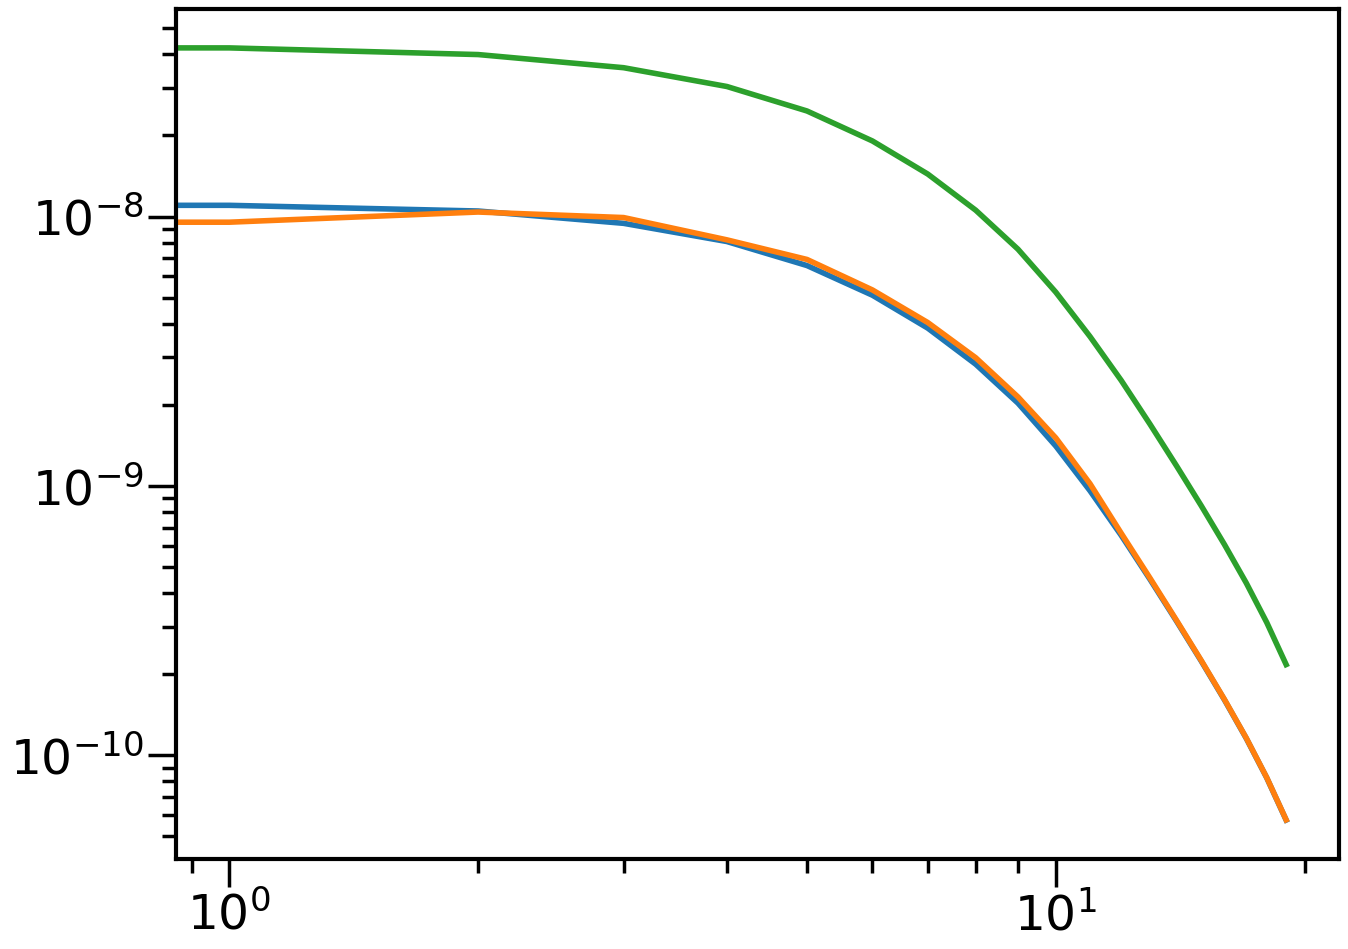

In [29]:
plot(cl0['pcl_b'])
plot(clb['pcl_b'])
plot(cl00['pcl_b'])
loglog()
show()

In [30]:
clb['pcl_b']/cl0['pcl_b']

array([1.0603468 , 0.8656048 , 0.9911963 , 1.0507231 , 1.01452127,
       1.05362722, 1.04622695, 1.04924424, 1.05700621, 1.05453181,
       1.07205961, 1.062249  , 1.01815772, 1.01068429, 1.00676183,
       1.00512409, 1.00365744, 1.00281429, 1.00228239, 1.00214585])

In [31]:
cl00['pcl_b']/clb['pcl_b'] #~4pi fsky.

array([3.71944038, 4.43805617, 3.8433682 , 3.6006983 , 3.70981948,
       3.55833678, 3.57382294, 3.55839084, 3.52993936, 3.53611735,
       3.47630416, 3.5189048 , 3.69401676, 3.72883378, 3.74658387,
       3.75424755, 3.76051845, 3.76407591, 3.76627785, 3.7706988 ])

In [32]:
np.diag(clb['cov']/cl0['cov'])

<ipython-input-32-156bccaf4f69>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(clb['cov']/cl0['cov'])


array([1.27697979, 0.60203561, 0.88350314, 1.08361712, 0.93708133,
       0.99180803, 1.00206752, 0.97224901, 1.00013707, 0.94968873,
       0.97901822, 0.97358038, 0.97450727, 0.97782371, 0.97065012,
       0.98088093, 0.97944729, 0.97667745, 0.97892001, 1.13423284])

In [33]:
def corr_matrix(cov=[]):
    err=np.sqrt(np.diag(cov))
    corr=cov/np.outer(err,err)
    return corr

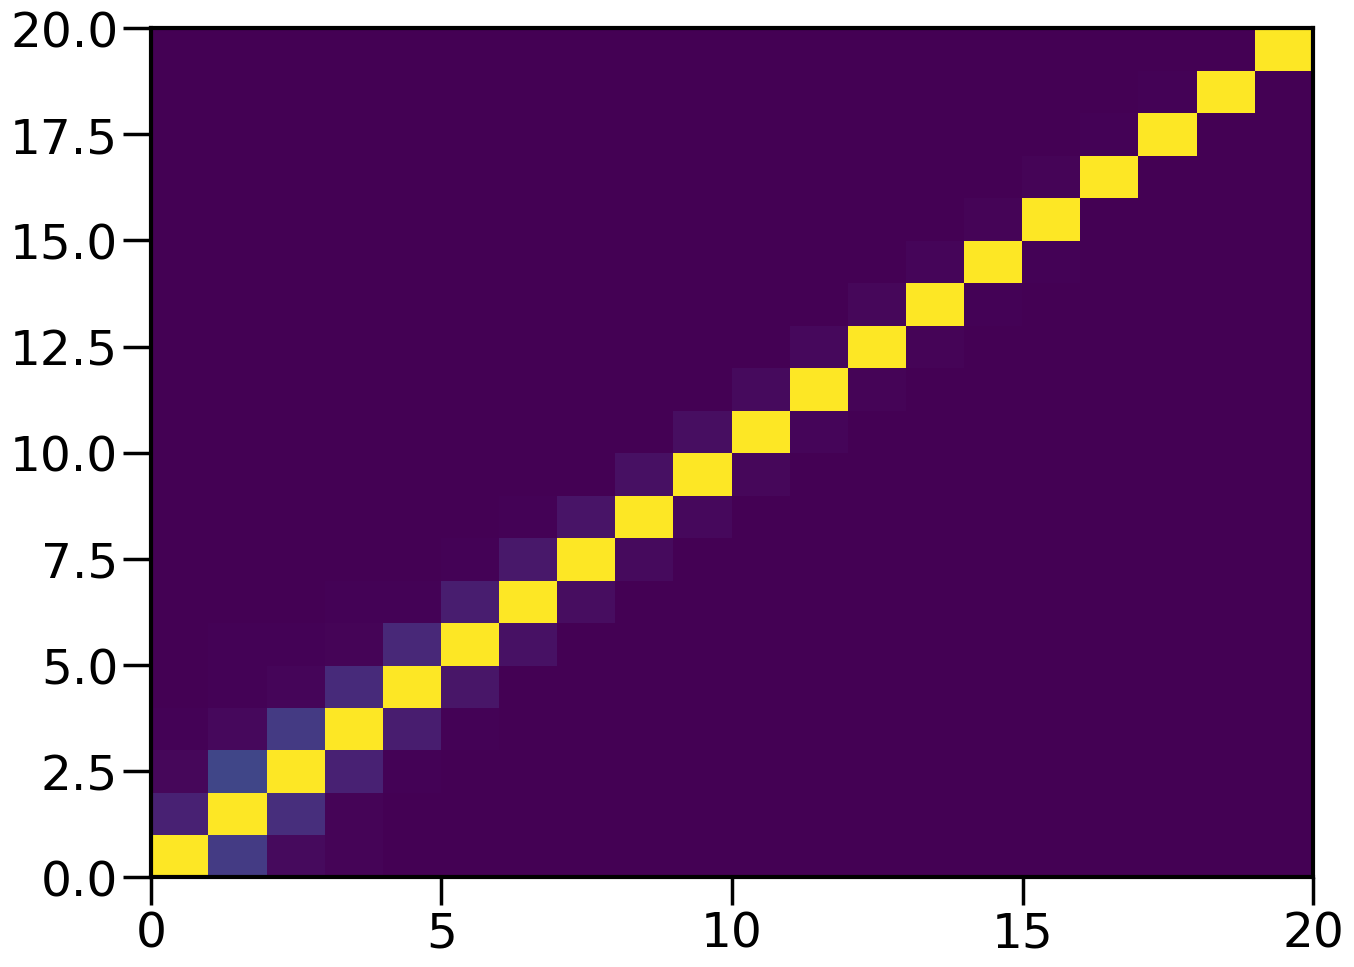

In [34]:
pcolor(corr_matrix(clb['cov']))
plt.show()

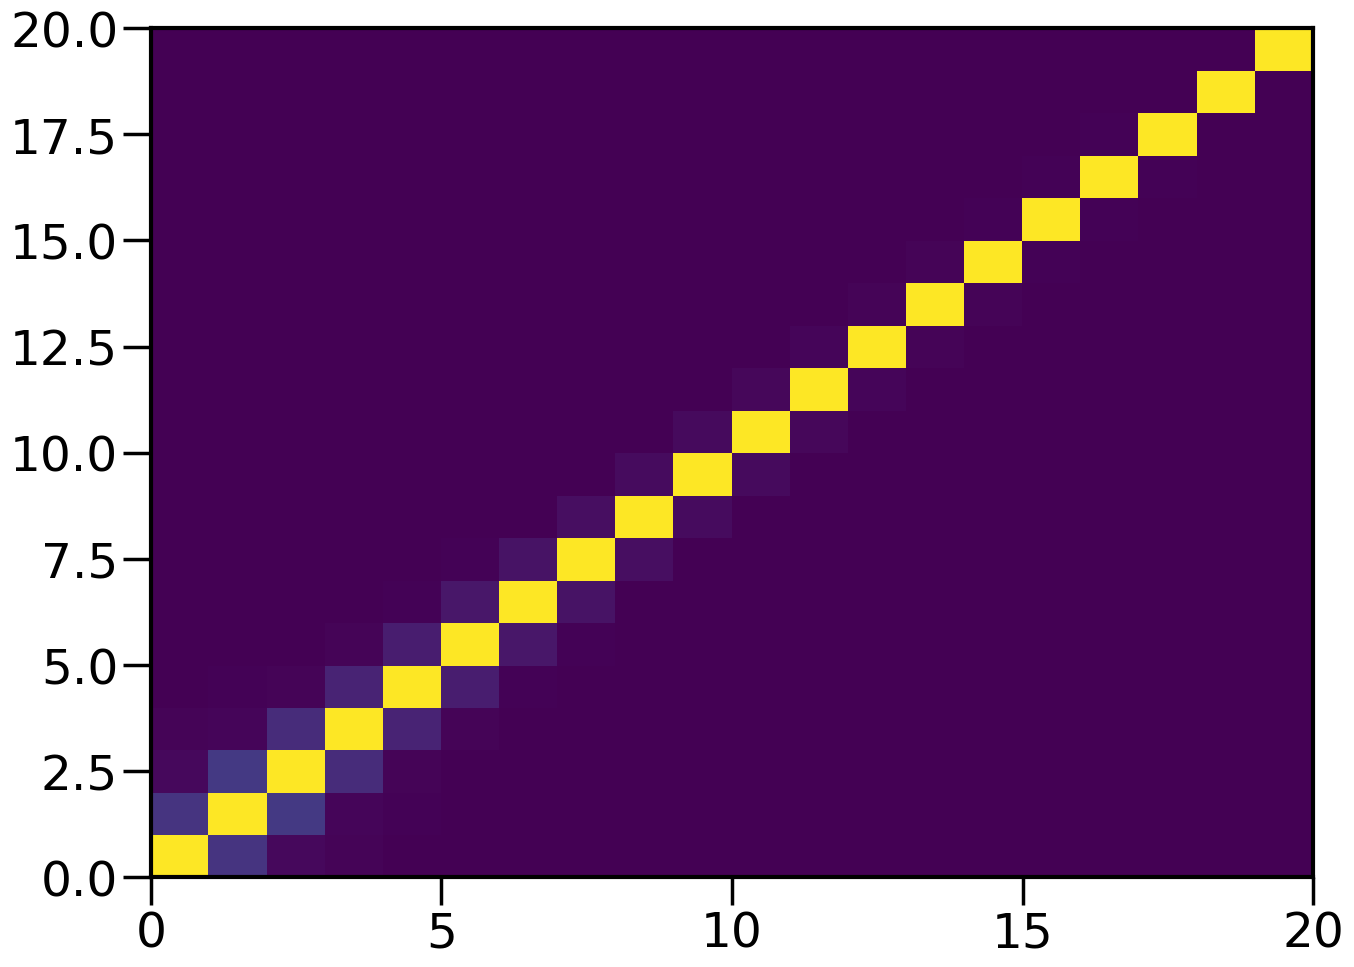

In [35]:
pcolor(corr_matrix(cl0['cov']))

In [36]:
np.diag(cl00['cov']/cl0['cov'])

<ipython-input-36-57a6f7b9c0bb>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(cl00['cov']/cl0['cov'])


array([  19.95979562,   38.47940157,   46.32147999,   56.39761354,
         72.69789774,   91.1242227 ,  117.52659231,  151.7084688 ,
        196.59332251,  255.81568341,  332.52633799,  436.44870517,
        572.20440596,  753.0846382 ,  991.95032339, 1306.60125445,
       1723.63625739, 2272.3313138 , 2995.09723461, 3948.24445638])

In [37]:
2*cl00['pcl_b']**2/np.diag(cl00['cov'])/(2*lb+1)/dl

array([2.37807715e+00, 1.57708443e-01, 1.22294993e-01, 9.27705819e-02,
       7.03672388e-02, 5.36272459e-02, 4.04981987e-02, 3.06942984e-02,
       2.32152436e-02, 1.76060254e-02, 1.33494371e-02, 1.00890514e-02,
       7.63792232e-03, 5.77384377e-03, 4.36819685e-03, 3.30661912e-03,
       2.50063358e-03, 1.89240545e-03, 1.43212037e-03, 1.08337860e-03])

In [38]:
%time xi00G=kappa00.xi_tomo() 
%time xi0G=kappa0.xi_tomo()  

In [39]:
%time xibG=kappa_b.xi_tomo()

In [40]:
xi00=client.compute(xi00G['stack']).result()
xi0=client.compute(xi0G['stack']).result()
xib=client.compute(xibG['stack']).result()

In [41]:
kappa_b.WT_binned[corr_ll][(2,2)][bi].shape

(20, 20)

[]

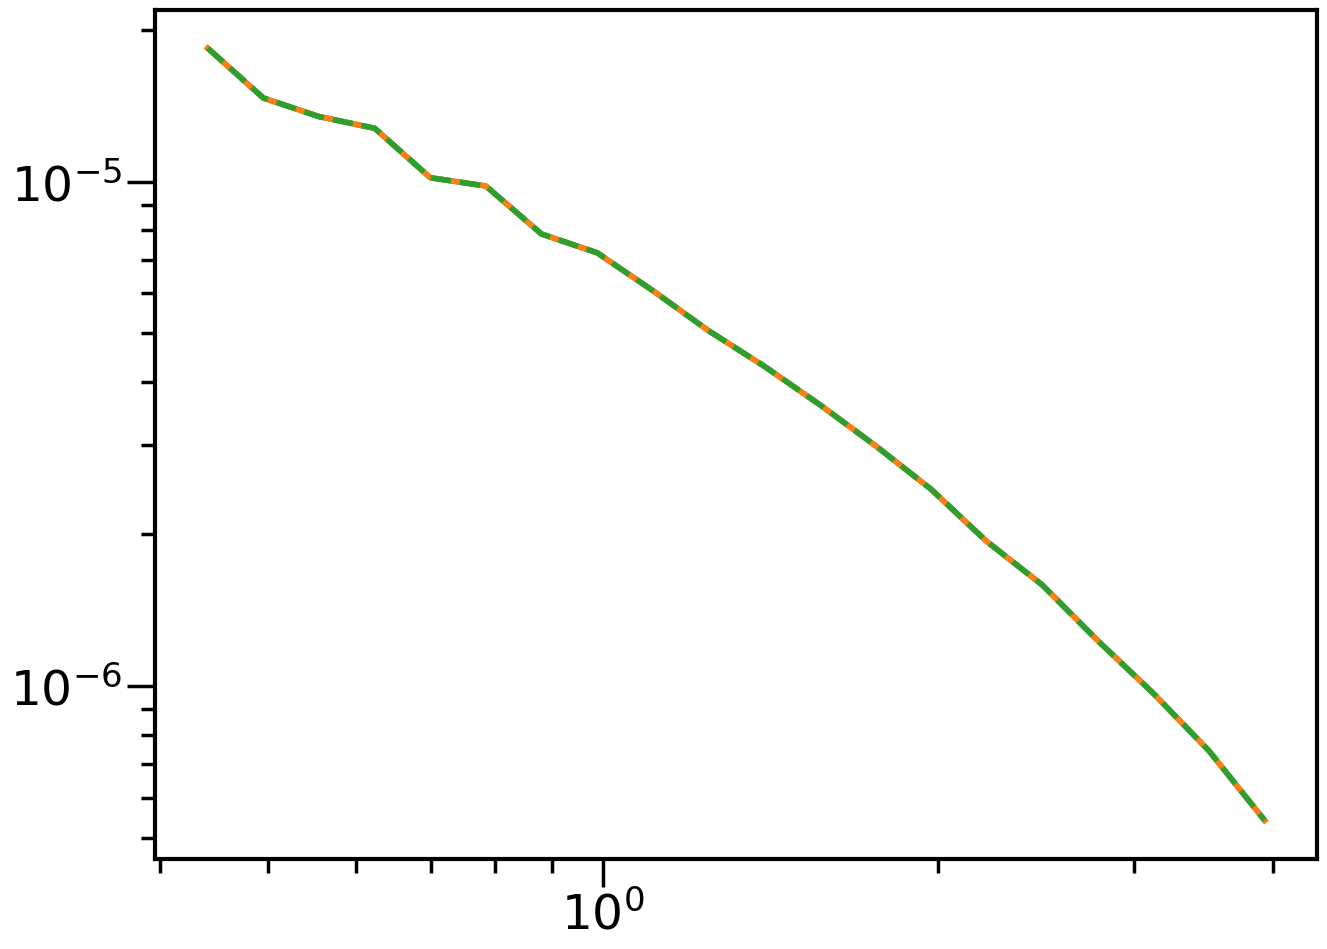

In [42]:
plot(thb,xi00['xi'][0:20])
plot(thb,xi0['xi'][0:20])
plot(thb,xib['xi'][0:20],'--')
loglog()

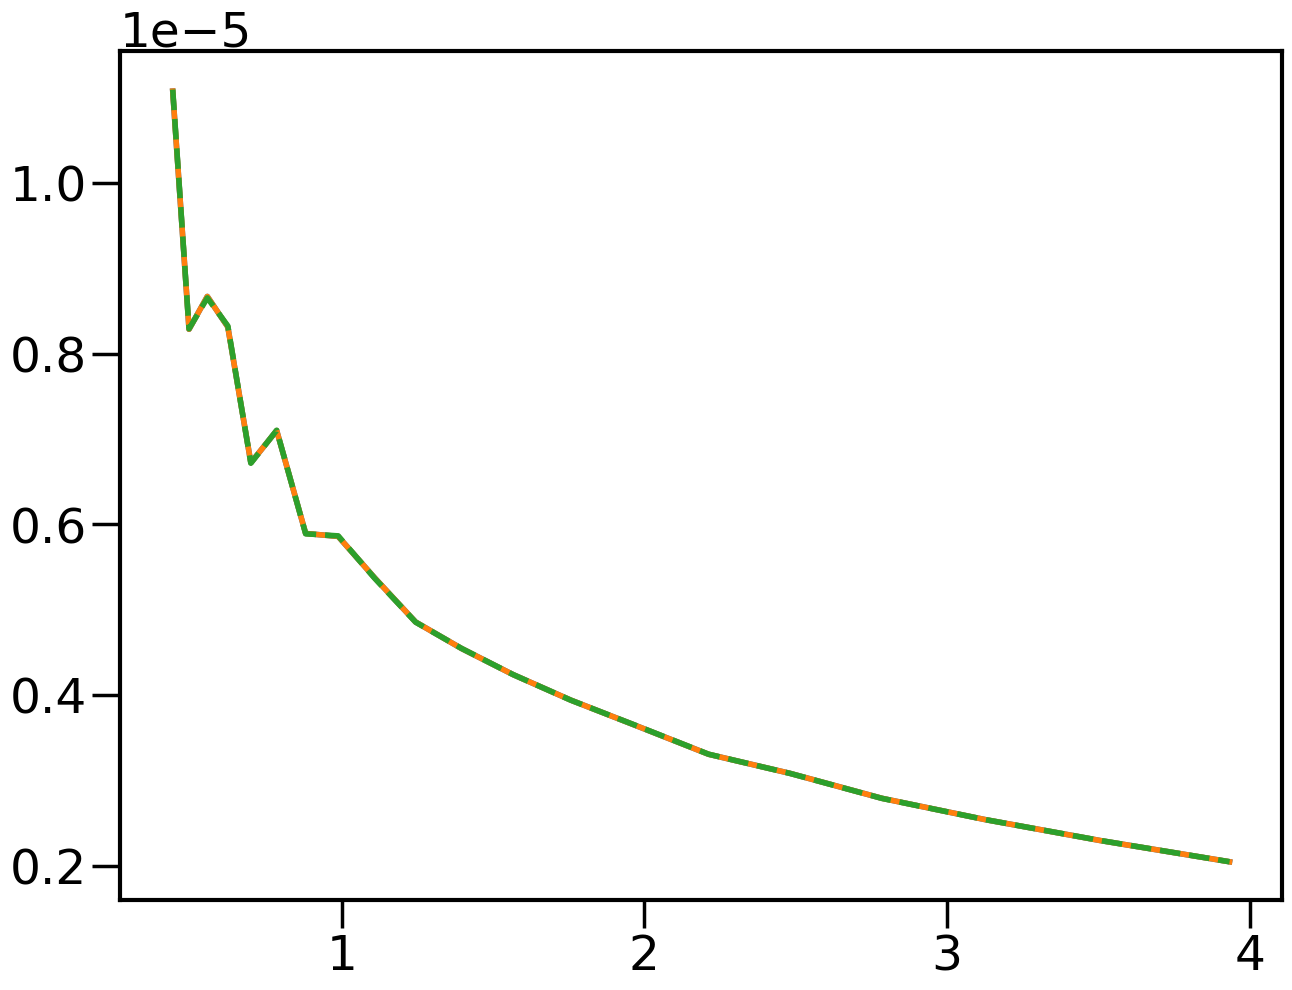

In [43]:
plot(thb,xi00['xi'][20:])
plot(thb,xi0['xi'][20:])
plot(thb,xib['xi'][20:],'--')

In [44]:
xi0['xi']

array([1.83757557e-05, 1.46391749e-05, 1.34611849e-05, 1.27521325e-05,
       1.01793066e-05, 9.79887263e-06, 7.87145484e-06, 7.22250101e-06,
       6.08149249e-06, 5.06485485e-06, 4.30683027e-06, 3.61304238e-06,
       2.99719600e-06, 2.45626137e-06, 1.93572015e-06, 1.58700246e-06,
       1.23005749e-06, 9.66682591e-07, 7.43302299e-07, 5.41469048e-07,
       1.10742515e-05, 8.28518853e-06, 8.66983278e-06, 8.31234786e-06,
       6.72219996e-06, 7.09940092e-06, 5.89384206e-06, 5.85947485e-06,
       5.37401260e-06, 4.85717125e-06, 4.54694814e-06, 4.24142401e-06,
       3.94180446e-06, 3.64479896e-06, 3.30826289e-06, 3.08393625e-06,
       2.79254218e-06, 2.54411907e-06, 2.29825598e-06, 2.04951888e-06])

In [45]:
xib['xi']/xi0['xi']

array([1.0005164 , 1.00088904, 0.99877379, 1.00064548, 0.99987394,
       0.99993361, 0.99981958, 1.00071432, 0.99914192, 0.99978529,
       1.00023531, 1.00001488, 0.99975248, 1.00042746, 1.00048968,
       0.99951735, 0.99933982, 0.99995914, 1.00074369, 0.99999155,
       1.00160288, 1.00069208, 0.99804318, 1.00149726, 0.99917695,
       1.00037473, 0.99935446, 1.00108071, 0.99909228, 0.99964762,
       1.00017561, 1.0000134 , 0.99984494, 1.00033806, 1.00022085,
       0.99980586, 0.99968439, 0.9999812 , 1.00025345, 0.9999689 ])

In [46]:
xib['xi']/xi00['xi']

array([1.00052106, 1.00089656, 0.99877233, 1.00065546, 0.99988084,
       0.99994207, 0.99982947, 1.00073866, 0.99914163, 0.99979981,
       1.00026906, 1.00005345, 0.99978786, 1.00045472, 1.00052665,
       0.99956059, 0.99938358, 1.00002434, 1.00081334, 1.00009018,
       1.00161079, 1.00069804, 0.9980367 , 1.00151077, 0.99917549,
       1.00038361, 0.9993533 , 1.00110373, 0.99908234, 0.99964776,
       1.00019397, 1.00003443, 0.99986093, 1.00034693, 1.00023465,
       0.99982241, 0.99969998, 1.00000593, 1.00028033, 1.00000355])

In [47]:
xi0['xi']/xi00['xi']

array([1.00000466, 1.0000075 , 0.99999854, 1.00000997, 1.0000069 ,
       1.00000845, 1.00000989, 1.00002433, 0.9999997 , 1.00001452,
       1.00003374, 1.00003858, 1.00003539, 1.00002725, 1.00003695,
       1.00004326, 1.00004379, 1.0000652 , 1.0000696 , 1.00009862,
       1.0000079 , 1.00000595, 0.9999935 , 1.00001349, 0.99999853,
       1.00000887, 0.99999884, 1.000023  , 0.99999005, 1.00000015,
       1.00001836, 1.00002103, 1.00001599, 1.00000887, 1.0000138 ,
       1.00001655, 1.0000156 , 1.00002474, 1.00002687, 1.00003465])

In [48]:
np.diag(xi0['cov']/xi00['cov'])

array([1.00175525, 1.00189977, 1.00211116, 1.00241567, 1.00284359,
       1.00342655, 1.00419063, 1.00514542, 1.00627179, 1.00751516,
       1.00879555, 1.01004134, 1.01123416, 1.01242996, 1.01373822,
       1.01530076, 1.01727088, 1.01966072, 1.02223612, 1.02487133,
       1.00175274, 1.00189713, 1.0021075 , 1.00241148, 1.0028388 ,
       1.00342097, 1.00418413, 1.00513785, 1.00626301, 1.00750486,
       1.00878334, 1.01002701, 1.01121767, 1.01241123, 1.01371687,
       1.01527655, 1.01724406, 1.01963115, 1.02220335, 1.0248364 ])

In [49]:
np.diag(xib['cov']/xi00['cov'])

array([6.08212621e+07, 3.62647906e+07, 5.03309308e+07, 4.39950075e+07,
       3.25386119e+07, 7.11227104e+07, 2.76114281e+07, 3.46527459e+07,
       1.36238396e+08, 5.07033524e+07, 2.18774901e+07, 4.12844238e+07,
       4.05111654e+07, 4.34130730e+07, 6.36530242e+06, 2.93858844e+06,
       1.15423018e+06, 3.97359424e+05, 6.39433576e+05, 1.99343928e+05,
       1.10506690e+08, 5.52588895e+07, 7.23857710e+07, 8.05754529e+07,
       5.06516180e+07, 6.94669377e+07, 5.11587058e+07, 6.12875676e+07,
       5.35298704e+07, 5.06024573e+07, 5.48179932e+07, 4.83985795e+07,
       4.90346587e+07, 4.90452102e+07, 4.08709419e+07, 3.66387983e+07,
       6.52080472e+07, 1.26670674e+07, 1.62214083e+07, 1.22383437e+07])

In [50]:
kappa0.Win.Win['cl'][corr_ll][bi]['xi_b']

array([0.26448361, 0.26438438, 0.26426367, 0.26411719, 0.26394107,
       0.26373168, 0.26348612, 0.26320283, 0.26288219, 0.26252684,
       0.26214133, 0.26173033, 0.26129517, 0.26082906, 0.26031359,
       0.25972134, 0.25902853, 0.25823258, 0.25735323, 0.25640507])

In [51]:
kappa_b.Win.Win['cl'][corr_ll][bi]['xi_b']

array([0.26448361, 0.26438438, 0.26426367, 0.26411719, 0.26394107,
       0.26373168, 0.26348612, 0.26320283, 0.26288219, 0.26252684,
       0.26214133, 0.26173033, 0.26129517, 0.26082906, 0.26031359,
       0.25972134, 0.25902853, 0.25823258, 0.25735323, 0.25640507])

In [52]:
kappa_b.Win.Win['cov'][corr_ll+corr_ll][bi+bi]['xi_b_th'][1324]['bin_wt_xi1324']['wt0']

array([1.24515718e-05, 1.24107123e-05, 1.23671631e-05, 1.23209548e-05,
       1.22721229e-05, 1.22207074e-05, 1.21667532e-05, 1.21103094e-05,
       1.20514301e-05, 1.19901739e-05, 1.19266037e-05, 1.18607872e-05,
       1.17927963e-05, 1.17227071e-05, 1.16506004e-05, 1.15765607e-05,
       1.15006768e-05, 1.14230414e-05, 1.13437511e-05, 1.12629060e-05,
       1.11806100e-05, 1.10969702e-05, 1.10120971e-05, 1.09261043e-05,
       1.08391080e-05, 1.07512276e-05, 1.06625847e-05, 1.05733032e-05,
       1.04835094e-05, 1.03933311e-05, 1.03028980e-05, 1.02123412e-05,
       1.01217930e-05, 1.00313865e-05, 9.94125551e-06, 9.85153439e-06,
       9.76235749e-06, 9.67385907e-06, 9.58617297e-06, 9.49943232e-06,
       9.41376930e-06, 9.32931477e-06, 9.24619806e-06, 9.16454660e-06,
       9.08448569e-06, 9.00613815e-06, 8.92962406e-06, 8.85506045e-06,
       8.78256100e-06, 8.71223576e-06, 8.64419084e-06, 8.57852815e-06,
       8.51534511e-06, 8.45473436e-06, 8.39678351e-06, 8.34157488e-06,
      

In [53]:
kappa_b.Win.Win['cov'][corr_ll+corr_ll][bi+bi]['xi_b_th'][1324]['bin_wt_xi1324']['wt_b']

array([7.00294373e+06, 8.93706624e+06, 1.09786637e+07, 1.44654545e+07,
       1.84882380e+07, 2.28727484e+07, 3.15774246e+07, 4.09689190e+07,
       5.03513492e+07, 6.90527005e+07, 9.78345143e+07, 1.14661350e+08,
       1.56002570e+08, 2.12404658e+08, 2.54018990e+08, 3.00239223e+08,
       7.62591434e+08, 2.05590078e+08, 3.72046351e+08, 4.19859695e+08])

In [54]:
kappa_b.Win.Win['cov'][corr_ll+corr_ll][bi+bi]['xi_b_th'][1324]['clcl'][(2,2,2,2)]

array([[ 10779.64873311,   9711.88290763,  15303.15061799,
         14134.88518184,  15567.23327827,  34609.38653944,
         19527.31892977,  27093.65281057, 139713.3201161 ,
         69008.52860259,  37702.81899548,  92142.86824192,
        119049.89416715, 170719.89737821,  36032.28944535,
         22023.58256781,  12709.79962466,   6205.76664527,
         14715.13159415,   7534.45171301],
       [ 10776.29438738,   9709.00478648,  15298.89491118,
         14131.24682791,  15563.60914513,  34602.28842478,
         19523.90680372,  27089.77537916, 139697.84370313,
         69002.84485723,  37700.56452173,  92138.65362399,
        119044.9122959 , 170711.95662684,  36030.34234844,
         22022.33955814,  12709.18434269,   6205.55733173,
         14714.77360966,   7534.2486185 ],
       [ 10772.19456857,   9705.4823659 ,  15293.6772183 ,
         14126.77594298,  15559.14194039,  34593.50255133,
         19519.65915513,  27084.91038641, 139678.20442782,
         68995.52569429,  376

In [55]:
kappa_b.Win.Win['cov'][corr_ll+corr_ll][bi+bi]['xi'][1324]['clcl']

array([[0.23364505, 0.23364356, 0.23364206, ..., 0.22631971, 0.2262962 ,
        0.22627263],
       [0.23364356, 0.23364207, 0.23364057, ..., 0.22631957, 0.22629607,
        0.22627249],
       [0.23364206, 0.23364057, 0.23363908, ..., 0.22631943, 0.22629593,
        0.22627235],
       ...,
       [0.22631971, 0.22631957, 0.22631943, ..., 0.22409477, 0.22407959,
        0.22406429],
       [0.2262962 , 0.22629607, 0.22629593, ..., 0.22407959, 0.22406448,
        0.22404926],
       [0.22627263, 0.22627249, 0.22627235, ..., 0.22406429, 0.22404926,
        0.2240341 ]])

In [75]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside,unit_win=unit_window,f_sky=f_sky,use_shot_noise=True)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt


In [76]:
use_binned_l=False
use_binned_theta=False
do_cov=True,
kappa00=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=False,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=False,scheduler_info=scheduler_info,
                                        do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                        xi_win_approx=xi_win_approx,do_sample_variance=False
                                       )

In [78]:
%time xi00G=kappa00.xi_tomo() 
%time cl00G=kappa00.cl_tomo() 

In [79]:
cov=client.compute(xi00G['cov']).result()
cov_cl=client.compute(cl00G['cov']).result()

In [90]:
np.diag(cov_cl[corr_ll+corr_ll][bi+bi]['G'])

array([3.85730716e-20, 3.85730716e-20, 3.85730716e-20, ...,
       3.85730716e-20, 3.85730716e-20, 3.85730716e-20])

In [99]:
kappa00.WT.wig_d[(0,0)]@cov_cl[corr_ll+corr_ll][bi+bi]['G']@kappa00.WT.wig_d[(0,0)].T

array([[9.04793008e-18, 9.03481077e-18, 9.02014207e-18, ...,
        5.32614083e-19, 5.31970152e-19, 5.31573427e-19],
       [9.03481077e-18, 9.02313477e-18, 9.00991438e-18, ...,
        5.32803513e-19, 5.32048208e-19, 5.31528734e-19],
       [9.02014207e-18, 9.00991438e-18, 8.99814870e-18, ...,
        5.32996786e-19, 5.32128683e-19, 5.31484638e-19],
       ...,
       [5.32614083e-19, 5.32803513e-19, 5.32996786e-19, ...,
        1.29619481e-18, 1.28733275e-18, 1.26447348e-18],
       [5.31970152e-19, 5.32048208e-19, 5.32128683e-19, ...,
        1.28733275e-18, 1.29322897e-18, 1.28448429e-18],
       [5.31573427e-19, 5.31528734e-19, 5.31484638e-19, ...,
        1.26447348e-18, 1.28448429e-18, 1.29046947e-18]])

In [101]:
kappa00.WT.wig_d[(0,0)]@kappa00.WT.wig_d[(0,0)].T

array([[234.56597299, 234.22585711, 233.84557372, ...,  13.80792508,
         13.79123128,  13.78094626],
       [234.22585711, 233.92315898, 233.5804227 , ...,  13.81283601,
         13.79325486,  13.77978758],
       [233.84557372, 233.5804227 , 233.27539952, ...,  13.81784658,
         13.79534118,  13.7786444 ],
       ...,
       [ 13.80792508,  13.81283601,  13.81784658, ...,  33.60361914,
         33.37387181,  32.78124943],
       [ 13.79123128,  13.79325486,  13.79534118, ...,  33.37387181,
         33.52673023,  33.30002595],
       [ 13.78094626,  13.77978758,  13.7786444 , ...,  32.78124943,
         33.30002595,  33.45519069]])

In [82]:
cov[corr_ll+corr_ll][(2,2,2,2)][bi+bi]

{'G': array([[ 4.55442007e-16,  2.30199335e-16, -4.29987758e-17,
         -8.31388721e-18,  1.65527217e-17, -1.26126930e-17,
          6.96736235e-18, -1.23895131e-18, -2.78820646e-18,
          1.48581536e-18,  8.28522103e-19,  2.76947376e-20,
         -3.77678074e-19, -2.89208023e-19,  5.76461440e-19,
         -4.37015034e-19,  1.14649472e-19,  2.29658871e-20,
         -4.20772535e-20,  1.30292604e-19],
        [ 2.30199335e-16,  4.16156529e-16,  1.68654116e-16,
         -5.55966497e-17,  2.45067327e-17, -1.38540314e-17,
          1.05952484e-17, -7.35415762e-18,  1.18245833e-18,
          2.32367065e-18,  3.38749263e-19, -8.67614195e-20,
         -3.67528593e-19, -7.09097415e-19,  6.08772774e-19,
         -4.66629431e-19,  2.44015148e-19,  1.94313109e-20,
         -1.05774366e-19,  1.79385213e-19],
        [-4.29987758e-17,  1.68654116e-16,  3.50168496e-16,
          1.26044177e-16, -4.67442410e-17,  2.58084690e-17,
         -1.54527507e-17,  6.84736668e-18,  1.58690859e-18,
       

In [116]:
HT_kwargs={'theta_min':th_min*d2r,'theta_max':th_max*d2r,'l_min':1.e-2,'l_max':lmax_cl,'logger':kappa00.logger}
HT=hankel_transform(**HT_kwargs)

04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 2000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 3000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 4000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 5000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 6000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 7000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 8000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 9000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 10000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 11000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 12000
04:26:35 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 13000
04:26:35 INFO:j-nu=0 not

04:26:42 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 102000
04:26:42 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 103000
04:26:42 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 104000
04:26:42 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 105000
04:26:42 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 106000
04:26:42 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 107000
04:26:43 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 108000
04:26:43 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 109000
04:26:43 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 110000
04:26:43 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 111000
04:26:43 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 112000
04:26:43 INFO:j-nu=0 not enough zeros to cover l_min, increasing by 1000 to 113000
04:2

In [117]:
HT.projected_covariance(cl_cov=np.diag(cov_cl[corr_ll+corr_ll][bi+bi]['G']),l_cl=kappa00.l,m1_m2=(0,0),taper=False)

(array([0.00589577, 0.00746546, 0.00903553, 0.01060582, 0.01217624,
        0.01374674, 0.0153173 , 0.01688791, 0.01845855, 0.02002921,
        0.0215999 , 0.02317059, 0.0247413 , 0.02631203, 0.02788276,
        0.02945349, 0.03102423, 0.03259498, 0.03416573, 0.03573649,
        0.03730725, 0.03887801, 0.04044878, 0.04201955, 0.04359031,
        0.04516109, 0.04673186, 0.04830263, 0.04987341, 0.05144419,
        0.05301497, 0.05458574, 0.05615653, 0.05772731, 0.05929809,
        0.06086887, 0.06243965, 0.06401044, 0.06558122, 0.06715201,
        0.06872279, 0.07029358, 0.07186437, 0.07343515]),
 array([[ 6.63483586e-16,  8.48139612e-24, -9.32989309e-24, ...,
          2.60056671e-23, -2.62940411e-23,  2.65792487e-23],
        [ 8.48139614e-24,  5.23805123e-16,  1.04969163e-23, ...,
         -2.92585675e-23,  2.95830125e-23, -2.99038951e-23],
        [-9.32989309e-24,  1.04969163e-23,  4.32709233e-16, ...,
          3.21856572e-23, -3.25425604e-23,  3.28955447e-23],
        ...,
       

In [120]:
th,c=WT.projected_covariance(cl_cov=np.diag(cov_cl[corr_ll+corr_ll][bi+bi]['G']),l_cl=kappa00.l,s1_s2=(0,0),taper=False)

In [128]:
WT.norm.shape,np.diag(cov_cl[corr_ll+corr_ll][bi+bi]['G']).shape

((2000,), (2000,))

In [129]:
WT.wig_d[(0,0)]@np.diag(cov_cl[corr_ll+corr_ll][bi+bi]['G'])*WT.norm #@WT.wig_d[(0,0)]

ValueError: operands could not be broadcast together with shapes (800,) (2000,) 

In [137]:
s1_s2=(0,0)
s1_s2_cross=(0,0)
cov=np.einsum('rk,k,sk->rs',WT.wig_d[s1_s2]*WT.norm,np.diag(cov_cl[corr_ll+corr_ll][bi+bi]['G']),
                    WT.wig_d[s1_s2_cross]*WT.norm)

In [138]:
cov

array([[ 8.92068065e-14,  8.88505551e-14,  8.84129093e-14, ...,
        -2.38479029e-16, -1.45513020e-16, -2.85447388e-17],
       [ 8.88505551e-14,  8.85643041e-14,  8.81970940e-14, ...,
        -2.20434452e-16, -1.38812795e-16, -3.42698170e-17],
       [ 8.84129093e-14,  8.81970940e-14,  8.79008524e-14, ...,
        -2.02007958e-16, -1.31877260e-16, -3.99457439e-17],
       ...,
       [-2.38479029e-16, -2.20434452e-16, -2.02007958e-16, ...,
         8.55130326e-15,  8.17791571e-15,  7.11195490e-15],
       [-1.45513020e-16, -1.38812795e-16, -1.31877260e-16, ...,
         8.17791571e-15,  8.55438508e-15,  8.19348938e-15],
       [-2.85447388e-17, -3.42698170e-17, -3.99457439e-17, ...,
         7.11195490e-15,  8.19348938e-15,  8.57740988e-15]])